In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/aptos-augmented-images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/6dcde47060f9.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/be68322c7223.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/bfef69b0ea0b.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/2b924db8e23d.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/a688f20f8895.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/ba9f4c275f4e.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/c9550b4f6534.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/d4be0403e6ab.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images/2/388f12e8df0b.png
/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images

In [3]:
!pip install tensorflow-addons


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.
ydata-profiling 4.10.0 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.


Found 6000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730664617.525319     122 service.cc:145] XLA service 0x796e0c005a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730664617.525377     122 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730664617.525381     122 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1730664724.797402     122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1730664724.92

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4786 - loss: 2.1284
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to dr_model_resnet_inception_v3.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.4789 - loss: 2.1275 - val_accuracy: 0.2000 - val_loss: 6.5294 - learning_rate: 1.0000e-04
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.6007 - loss: 1.7494
Epoch 2: val_accuracy improved from 0.20000 to 0.33400, saving model to dr_model_resnet_inception_v3.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.6008 - loss: 1.7491 - val_accuracy: 0.3340 - val_loss: 3.1812 - learning_rate: 1.0000e-04
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.6637 - loss: 1.6168
Epoch 3: val_accuracy improved from 0.33400 to 0.51950, saving model to dr_model_resnet_inception_v3.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.6637 - loss: 1.6168 - val_accuracy: 0.5195 - val_loss: 1.9074 - learning_rate: 1.000

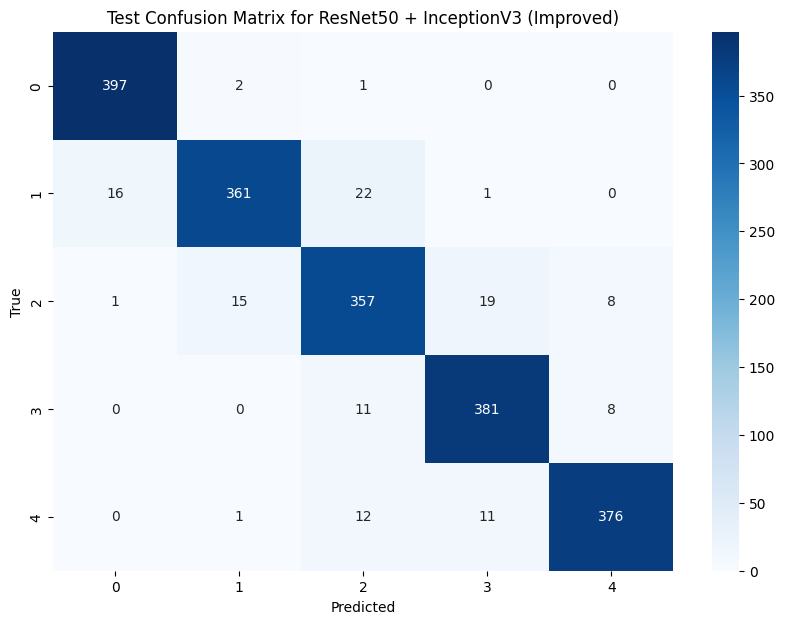

In [5]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam  # AdamW is now part of tf.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Concatenate, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Set dataset paths
data_directory = '/kaggle/input/aptos-augmented-images/aptos-augmented-images/aptos-augmented-images'
base_dir = '/kaggle/working/split_dataset'

# Step 1: Split data into train, validation, and test sets
def split_data(data_dir, base_dir, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    if os.path.exists(base_dir):
        shutil.rmtree(base_dir)
        
    os.makedirs(base_dir, exist_ok=True)
    train_dir = os.path.join(base_dir, 'train')
    val_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        files = [os.path.join(class_path, f) for f in os.listdir(class_path)]
        np.random.shuffle(files)

        train_size = int(train_ratio * len(files))
        val_size = int(val_ratio * len(files))
        
        train_files = files[:train_size]
        val_files = files[train_size:train_size + val_size]
        test_files = files[train_size + val_size:]

        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        for file in train_files:
            shutil.copy(file, os.path.join(train_dir, class_name))
        for file in val_files:
            shutil.copy(file, os.path.join(val_dir, class_name))
        for file in test_files:
            shutil.copy(file, os.path.join(test_dir, class_name))

split_data(data_directory, base_dir)

# Step 2: Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.6, 1.4],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_generator = ImageDataGenerator(rescale=1.0 / 255.0).flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Step 3: Define the Hybrid Model with ResNet50 and InceptionV3
def build_hybrid_model_resnet_inception():
    input_layer = Input(shape=(299, 299, 3))

    # ResNet50 Model
    resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=input_layer)
    resnet_output = GlobalAveragePooling2D()(resnet.output)

    # InceptionV3 Model
    inception = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_layer)
    inception_output = GlobalAveragePooling2D()(inception.output)

    # Combine Outputs using Concatenate
    combined_output = Concatenate()([resnet_output, inception_output])

    # Dense Layers with increased capacity
    dense_layer = Dense(1024, kernel_regularizer=tf.keras.regularizers.l2(0.0005))(combined_output)
    dense_layer = BatchNormalization()(dense_layer)
    dense_layer = Activation('relu')(dense_layer)
    dropout_layer = Dropout(0.5)(dense_layer)  # Increased dropout rate to 0.5
    dense_layer = Dense(512, activation='relu')(dropout_layer)  # Additional dense layer
    output_layer = Dense(5, activation='softmax')(dense_layer)  # Adjust number of classes if needed

    model = Model(inputs=input_layer, outputs=output_layer)

    # Unfreeze more layers for fine-tuning
    for layer in resnet.layers[-60:]:  
        layer.trainable = True
    for layer in inception.layers[-60:]:  
        layer.trainable = True

    return model

# Step 4: Compile the Model with AdamW optimizer from tf.keras
hybrid_model_resnet_inception = build_hybrid_model_resnet_inception()
hybrid_model_resnet_inception.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Callbacks
checkpoint = ModelCheckpoint(
    'dr_model_resnet_inception_v3.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=8,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,  # Reduced patience for faster adaptation
    min_lr=1e-6,
    verbose=1
)

# Step 6: Class Weights
labels = train_generator.classes
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# Step 7: Train the Model
history_resnet_inception = hybrid_model_resnet_inception.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Increased epochs
    callbacks=[checkpoint, early_stopping, reduce_lr],
    class_weight=class_weights,
    verbose=1
)

# Step 8: Evaluate on Test Data
test_loss_resnet_inception, test_accuracy_resnet_inception = hybrid_model_resnet_inception.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss_resnet_inception:.4f}, Test Accuracy: {test_accuracy_resnet_inception:.4f}")

# Step 9: Classification Report and Confusion Matrix
predictions_resnet_inception = hybrid_model_resnet_inception.predict(test_generator)
predicted_classes_resnet_inception = np.argmax(predictions_resnet_inception, axis=1)
true_classes_resnet_inception = test_generator.classes

report_resnet_inception = classification_report(true_classes_resnet_inception, predicted_classes_resnet_inception, target_names=test_generator.class_indices.keys())
print(report_resnet_inception)

cm_resnet_inception = confusion_matrix(true_classes_resnet_inception, predicted_classes_resnet_inception)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_resnet_inception, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix for ResNet50 + InceptionV3 (Improved)')
plt.show()


In [6]:
hybrid_model_resnet_inception.save('highest93ri.h5')

In [7]:
hybrid_model_resnet_inception.save('highest93ri.keras')

In [8]:
!zip -j /kaggle/working/highest93ri.zip /kaggle/working/highest93ri.h5

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: highest93ri.h5 (deflated 8%)


In [9]:
!cd /kaggle/working

In [10]:
!ls

dr_model_resnet_inception_v3.keras  highest93ri.keras  split_dataset
highest93ri.h5			    highest93ri.zip


In [11]:
from IPython.display import FileLink
FileLink(r'highest93ri.h5')

/kaggle/working/highest93ri.h5

In [12]:
from IPython.display import FileLink
FileLink(r'highest93ri.keras')

/kaggle/working/highest93ri.keras

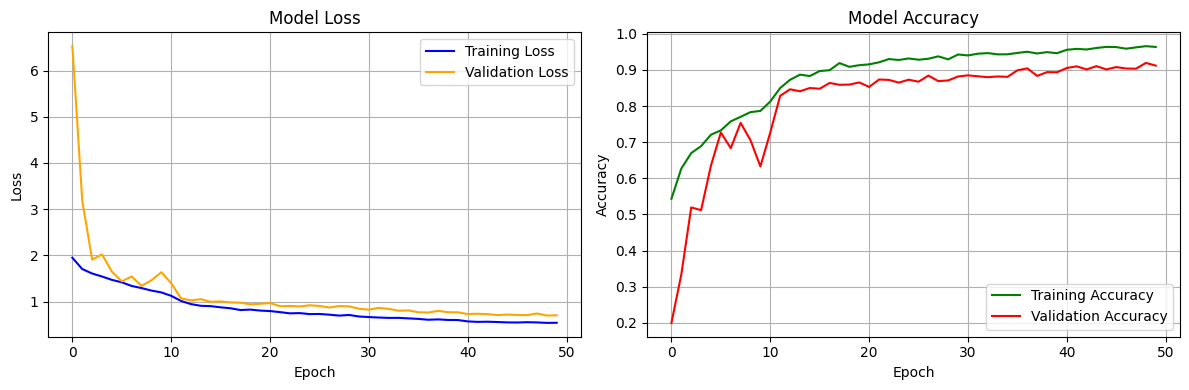

In [14]:
# After training the model

# Step 10: Plotting Loss and Accuracy
def plot_metrics(history):
    # Plotting Loss
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_metrics(history_resnet_inception)

# Additional metrics can be plotted here if needed